In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [11]:
df = pd.read_csv("../data/mi_matched_precinct_classifier.csv")
df.columns

Index(['total_pop', 'pop_density', 'prop_white', 'prop_Black', 'prop_Hispanic',
       'prop_AIA', 'prop_Asian', 'prop_married', 'prop_nonfamily',
       'prop_family_nonmarried', 'prop_hs_diploma', 'prop_some_college',
       'prop_bachelors', 'prop_higher', 'prop_under_hs', 'prop_under_30k',
       'prop_30_to_50k', 'prop_50_to_100k', 'prop_more_than_100k',
       'D_pct_vote', 'Weighted_ideology', 'Winner', 'Partisanship',
       'Aggregate'],
      dtype='object')

In [12]:
x = df.iloc[:,:-5]
y = df.iloc[:,-1:]
x.columns

Index(['total_pop', 'pop_density', 'prop_white', 'prop_Black', 'prop_Hispanic',
       'prop_AIA', 'prop_Asian', 'prop_married', 'prop_nonfamily',
       'prop_family_nonmarried', 'prop_hs_diploma', 'prop_some_college',
       'prop_bachelors', 'prop_higher', 'prop_under_hs', 'prop_under_30k',
       'prop_30_to_50k', 'prop_50_to_100k', 'prop_more_than_100k'],
      dtype='object')

In [13]:
x.to_numpy()
y.to_numpy()


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [14]:
y.value_counts()


Aggregate       
Democrat,Close      140
Republican,Close     98
Republican,Split     10
Democrat,Split        2
dtype: int64

In [19]:
x
col_names = ['total_pop', 'pop_density', 'prop_white', 'prop_Black', 'prop_Hispanic',
       'prop_AIA', 'prop_Asian', 'prop_married', 'prop_nonfamily',
       'prop_family_nonmarried', 'prop_hs_diploma', 'prop_some_college',
       'prop_bachelors', 'prop_higher', 'prop_under_hs', 'prop_under_30k',
       'prop_30_to_50k', 'prop_50_to_100k', 'prop_more_than_100k']

In [20]:
y

,Aggregate
0,"Republican,Split"
1,"Republican,Split"
2,"Republican,Split"
3,"Republican,Split"
4,"Republican,Close"
...,...
245,"Republican,Close"
246,"Republican,Close"
247,"Republican,Close"
248,"Republican,Close"


Tree of depth 1
accuracy score: 0.6265060240963856


|--- prop_white <= 0.86
|   |--- class: Democrat,Close
|--- prop_white >  0.86
|   |--- class: Republican,Close



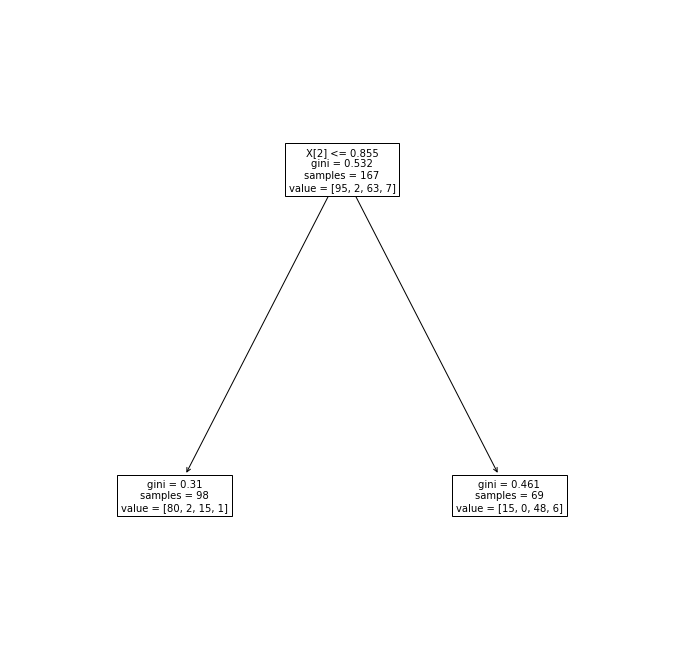

Tree of depth 2
accuracy score: 0.6626506024096386


|--- prop_white <= 0.86
|   |--- prop_Black <= 0.05
|   |   |--- class: Democrat,Close
|   |--- prop_Black >  0.05
|   |   |--- class: Democrat,Close
|--- prop_white >  0.86
|   |--- pop_density <= 0.00
|   |   |--- class: Republican,Split
|   |--- pop_density >  0.00
|   |   |--- class: Republican,Close



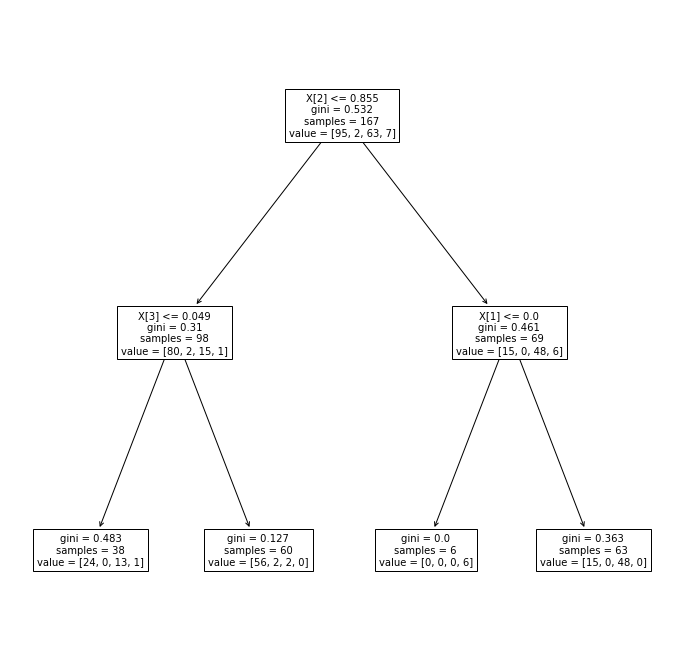

Tree of depth 3
accuracy score: 0.6626506024096386


|--- prop_white <= 0.86
|   |--- prop_Black <= 0.05
|   |   |--- prop_bachelors <= 0.32
|   |   |   |--- class: Democrat,Close
|   |   |--- prop_bachelors >  0.32
|   |   |   |--- class: Democrat,Close
|   |--- prop_Black >  0.05
|   |   |--- prop_Black <= 0.33
|   |   |   |--- class: Democrat,Close
|   |   |--- prop_Black >  0.33
|   |   |   |--- class: Democrat,Split
|--- prop_white >  0.86
|   |--- pop_density <= 0.00
|   |   |--- class: Republican,Split
|   |--- pop_density >  0.00
|   |   |--- pop_density <= 0.00
|   |   |   |--- class: Republican,Close
|   |   |--- pop_density >  0.00
|   |   |   |--- class: Republican,Close



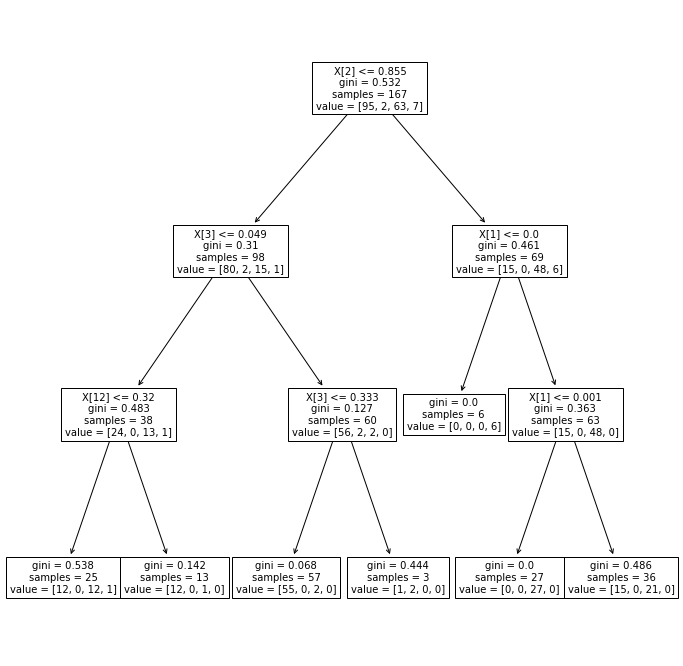

Tree of depth 4
accuracy score: 0.6626506024096386


|--- prop_white <= 0.86
|   |--- prop_Black <= 0.05
|   |   |--- prop_bachelors <= 0.32
|   |   |   |--- pop_density <= 0.00
|   |   |   |   |--- class: Democrat,Close
|   |   |   |--- pop_density >  0.00
|   |   |   |   |--- class: Republican,Close
|   |   |--- prop_bachelors >  0.32
|   |   |   |--- prop_30_to_50k <= 0.15
|   |   |   |   |--- class: Democrat,Close
|   |   |   |--- prop_30_to_50k >  0.15
|   |   |   |   |--- class: Republican,Close
|   |--- prop_Black >  0.05
|   |   |--- prop_Black <= 0.33
|   |   |   |--- prop_Asian <= 0.01
|   |   |   |   |--- class: Democrat,Close
|   |   |   |--- prop_Asian >  0.01
|   |   |   |   |--- class: Democrat,Close
|   |   |--- prop_Black >  0.33
|   |   |   |--- prop_under_30k <= 0.36
|   |   |   |   |--- class: Democrat,Split
|   |   |   |--- prop_under_30k >  0.36
|   |   |   |   |--- class: Democrat,Close
|--- prop_white >  0.86
|   |--- prop_bachelors <= 0.11
|   |   |--- class: R

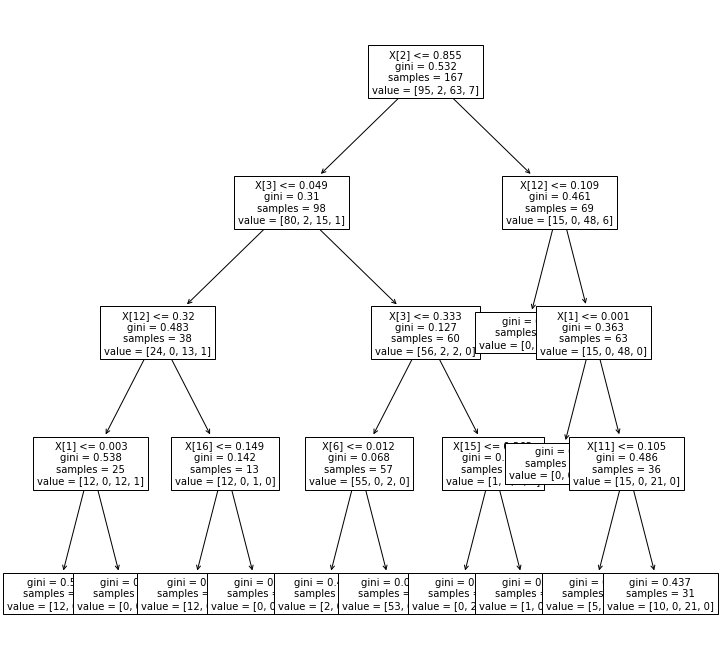

Tree of depth 5
accuracy score: 0.6746987951807228


|--- prop_white <= 0.86
|   |--- prop_Black <= 0.05
|   |   |--- prop_bachelors <= 0.32
|   |   |   |--- prop_white <= 0.83
|   |   |   |   |--- prop_white <= 0.73
|   |   |   |   |   |--- class: Democrat,Close
|   |   |   |   |--- prop_white >  0.73
|   |   |   |   |   |--- class: Republican,Close
|   |   |   |--- prop_white >  0.83
|   |   |   |   |--- class: Democrat,Close
|   |   |--- prop_bachelors >  0.32
|   |   |   |--- prop_30_to_50k <= 0.15
|   |   |   |   |--- class: Democrat,Close
|   |   |   |--- prop_30_to_50k >  0.15
|   |   |   |   |--- class: Republican,Close
|   |--- prop_Black >  0.05
|   |   |--- prop_Black <= 0.33
|   |   |   |--- prop_Asian <= 0.01
|   |   |   |   |--- prop_nonfamily <= 0.26
|   |   |   |   |   |--- class: Republican,Close
|   |   |   |   |--- prop_nonfamily >  0.26
|   |   |   |   |   |--- class: Democrat,Close
|   |   |   |--- prop_Asian >  0.01
|   |   |   |   |--- prop_higher <= 0.07
|   |  

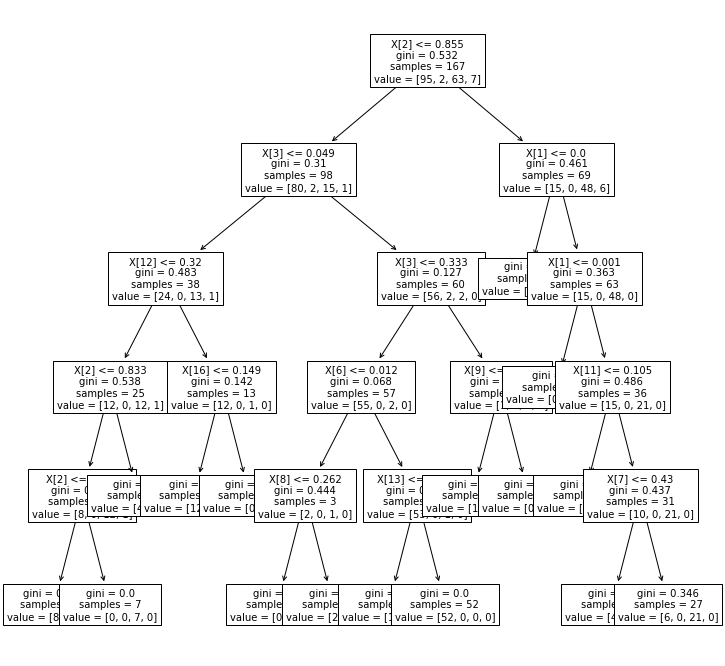

Tree of depth 6
accuracy score: 0.6746987951807228


|--- prop_white <= 0.86
|   |--- prop_Black <= 0.05
|   |   |--- prop_bachelors <= 0.32
|   |   |   |--- prop_white <= 0.83
|   |   |   |   |--- prop_white <= 0.73
|   |   |   |   |   |--- prop_nonfamily <= 0.17
|   |   |   |   |   |   |--- class: Republican,Close
|   |   |   |   |   |--- prop_nonfamily >  0.17
|   |   |   |   |   |   |--- class: Democrat,Close
|   |   |   |   |--- prop_white >  0.73
|   |   |   |   |   |--- class: Republican,Close
|   |   |   |--- prop_white >  0.83
|   |   |   |   |--- class: Democrat,Close
|   |   |--- prop_bachelors >  0.32
|   |   |   |--- prop_30_to_50k <= 0.15
|   |   |   |   |--- class: Democrat,Close
|   |   |   |--- prop_30_to_50k >  0.15
|   |   |   |   |--- class: Republican,Close
|   |--- prop_Black >  0.05
|   |   |--- prop_Black <= 0.33
|   |   |   |--- prop_Asian <= 0.01
|   |   |   |   |--- prop_AIA <= 0.02
|   |   |   |   |   |--- class: Democrat,Close
|   |   |   |   |--- prop_AIA 

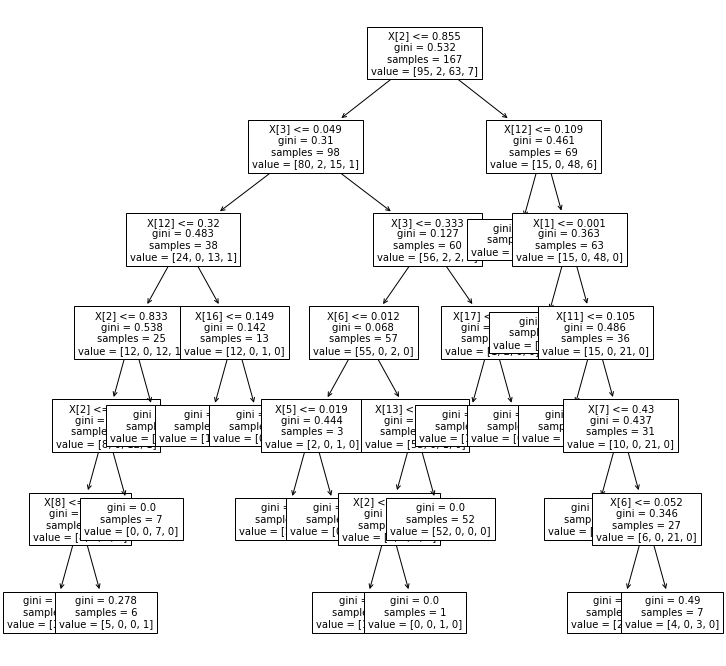

Tree of depth 7
accuracy score: 0.6385542168674698


|--- prop_white <= 0.86
|   |--- prop_Black <= 0.05
|   |   |--- prop_bachelors <= 0.32
|   |   |   |--- pop_density <= 0.00
|   |   |   |   |--- prop_Black <= 0.05
|   |   |   |   |   |--- prop_family_nonmarried <= 0.08
|   |   |   |   |   |   |--- prop_30_to_50k <= 0.06
|   |   |   |   |   |   |   |--- class: Republican,Close
|   |   |   |   |   |   |--- prop_30_to_50k >  0.06
|   |   |   |   |   |   |   |--- class: Democrat,Close
|   |   |   |   |   |--- prop_family_nonmarried >  0.08
|   |   |   |   |   |   |--- prop_AIA <= 0.09
|   |   |   |   |   |   |   |--- class: Democrat,Close
|   |   |   |   |   |   |--- prop_AIA >  0.09
|   |   |   |   |   |   |   |--- class: Republican,Split
|   |   |   |   |--- prop_Black >  0.05
|   |   |   |   |   |--- class: Republican,Close
|   |   |   |--- pop_density >  0.00
|   |   |   |   |--- class: Republican,Close
|   |   |--- prop_bachelors >  0.32
|   |   |   |--- prop_30_to_50k <= 0.15
|  

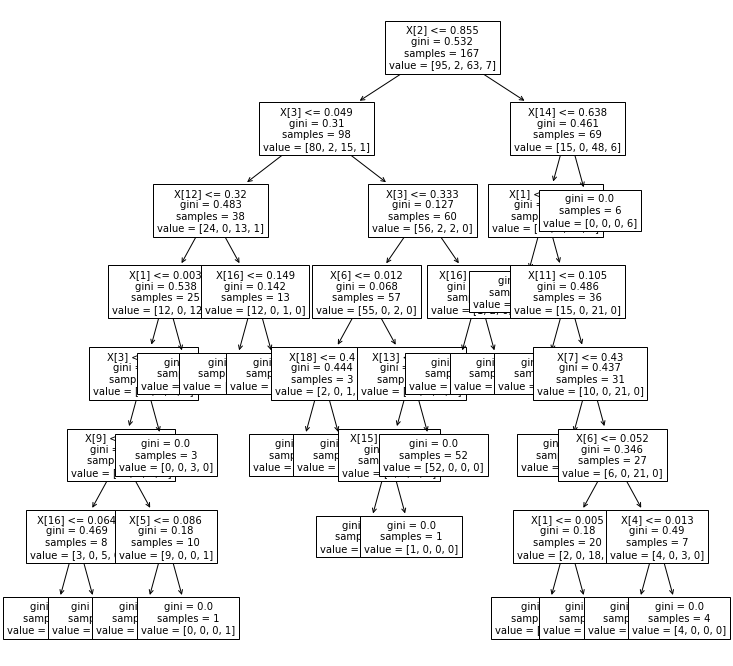

Tree of depth 8
accuracy score: 0.6506024096385542


|--- prop_white <= 0.86
|   |--- prop_Black <= 0.05
|   |   |--- prop_bachelors <= 0.32
|   |   |   |--- prop_white <= 0.83
|   |   |   |   |--- prop_white <= 0.73
|   |   |   |   |   |--- prop_nonfamily <= 0.17
|   |   |   |   |   |   |--- prop_more_than_100k <= 0.70
|   |   |   |   |   |   |   |--- class: Republican,Close
|   |   |   |   |   |   |--- prop_more_than_100k >  0.70
|   |   |   |   |   |   |   |--- total_pop <= 733.73
|   |   |   |   |   |   |   |   |--- class: Republican,Close
|   |   |   |   |   |   |   |--- total_pop >  733.73
|   |   |   |   |   |   |   |   |--- class: Democrat,Close
|   |   |   |   |   |--- prop_nonfamily >  0.17
|   |   |   |   |   |   |--- prop_30_to_50k <= 0.15
|   |   |   |   |   |   |   |--- class: Democrat,Close
|   |   |   |   |   |   |--- prop_30_to_50k >  0.15
|   |   |   |   |   |   |   |--- class: Republican,Split
|   |   |   |   |--- prop_white >  0.73
|   |   |   |   |   |--- class: Re

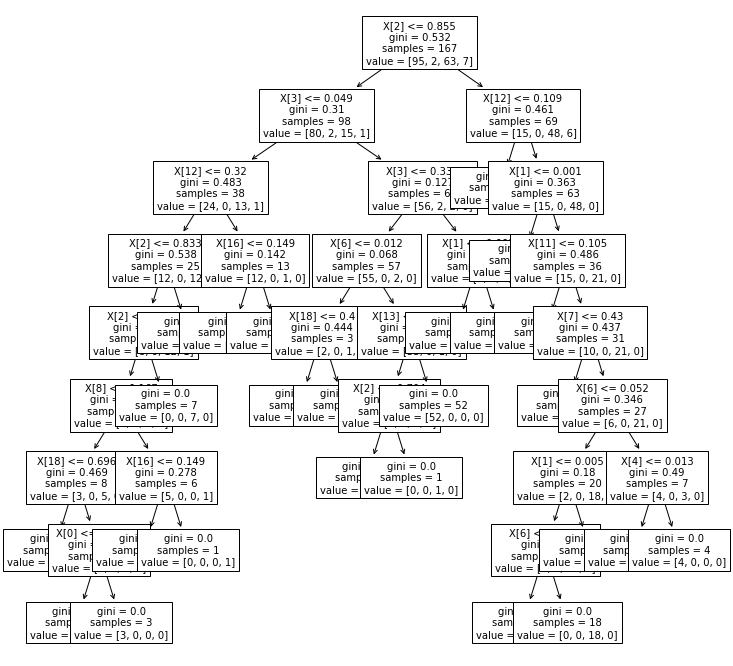

Tree of depth 9
accuracy score: 0.6867469879518072


|--- prop_white <= 0.86
|   |--- prop_Black <= 0.05
|   |   |--- prop_bachelors <= 0.32
|   |   |   |--- pop_density <= 0.00
|   |   |   |   |--- prop_Black <= 0.05
|   |   |   |   |   |--- prop_family_nonmarried <= 0.08
|   |   |   |   |   |   |--- prop_Hispanic <= 0.01
|   |   |   |   |   |   |   |--- class: Republican,Close
|   |   |   |   |   |   |--- prop_Hispanic >  0.01
|   |   |   |   |   |   |   |--- prop_nonfamily <= 0.13
|   |   |   |   |   |   |   |   |--- pop_density <= 0.00
|   |   |   |   |   |   |   |   |   |--- class: Democrat,Close
|   |   |   |   |   |   |   |   |--- pop_density >  0.00
|   |   |   |   |   |   |   |   |   |--- class: Republican,Close
|   |   |   |   |   |   |   |--- prop_nonfamily >  0.13
|   |   |   |   |   |   |   |   |--- class: Democrat,Close
|   |   |   |   |   |--- prop_family_nonmarried >  0.08
|   |   |   |   |   |   |--- total_pop <= 1594.08
|   |   |   |   |   |   |   |--- class: Republic

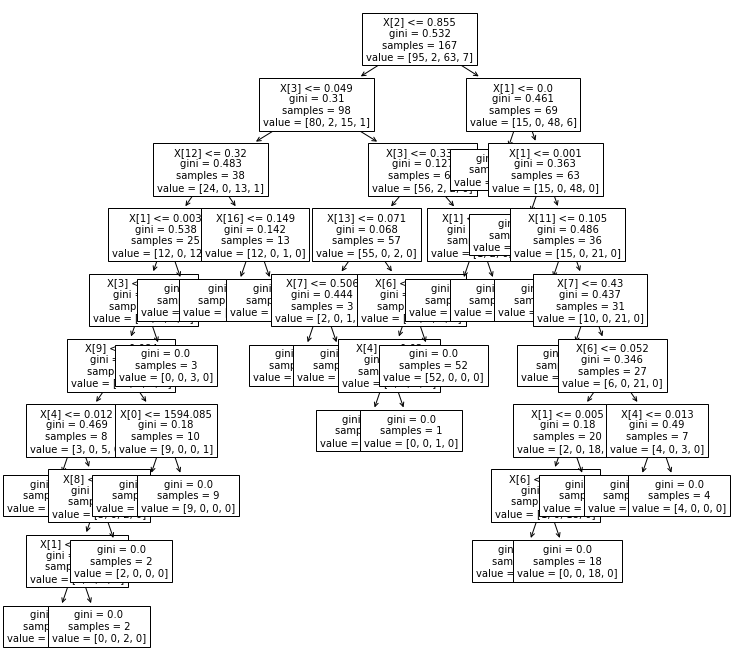

Tree of depth 10
accuracy score: 0.6746987951807228


|--- prop_white <= 0.86
|   |--- prop_Black <= 0.05
|   |   |--- prop_bachelors <= 0.32
|   |   |   |--- prop_white <= 0.83
|   |   |   |   |--- prop_white <= 0.73
|   |   |   |   |   |--- prop_nonfamily <= 0.17
|   |   |   |   |   |   |--- prop_more_than_100k <= 0.70
|   |   |   |   |   |   |   |--- class: Republican,Close
|   |   |   |   |   |   |--- prop_more_than_100k >  0.70
|   |   |   |   |   |   |   |--- total_pop <= 733.73
|   |   |   |   |   |   |   |   |--- class: Republican,Close
|   |   |   |   |   |   |   |--- total_pop >  733.73
|   |   |   |   |   |   |   |   |--- class: Democrat,Close
|   |   |   |   |   |--- prop_nonfamily >  0.17
|   |   |   |   |   |   |--- prop_Black <= 0.03
|   |   |   |   |   |   |   |--- class: Democrat,Close
|   |   |   |   |   |   |--- prop_Black >  0.03
|   |   |   |   |   |   |   |--- class: Republican,Split
|   |   |   |   |--- prop_white >  0.73
|   |   |   |   |   |--- class: Republica

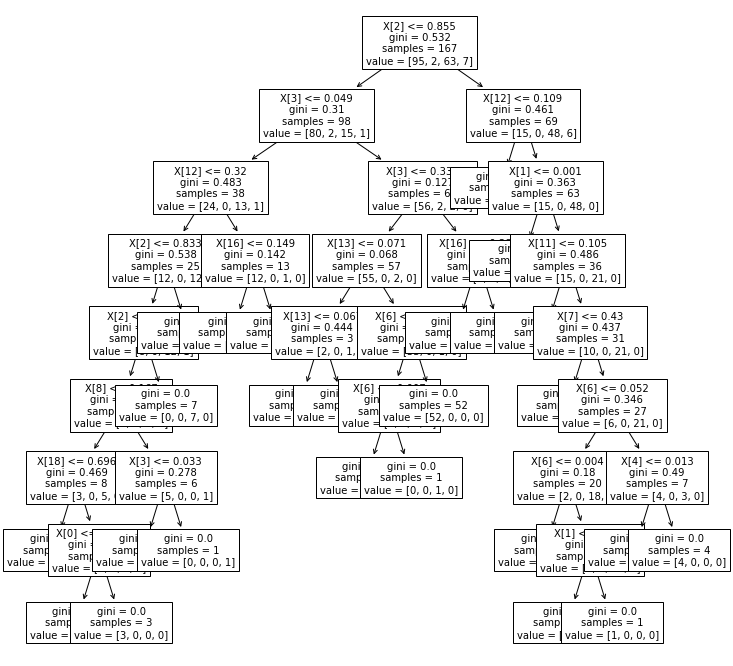

Tree of depth 11
accuracy score: 0.6867469879518072


|--- prop_white <= 0.86
|   |--- prop_Black <= 0.05
|   |   |--- prop_bachelors <= 0.32
|   |   |   |--- prop_Black <= 0.04
|   |   |   |   |--- prop_married <= 0.70
|   |   |   |   |   |--- pop_density <= 0.00
|   |   |   |   |   |   |--- class: Republican,Split
|   |   |   |   |   |--- pop_density >  0.00
|   |   |   |   |   |   |--- class: Democrat,Close
|   |   |   |   |--- prop_married >  0.70
|   |   |   |   |   |--- prop_Hispanic <= 0.01
|   |   |   |   |   |   |--- class: Republican,Close
|   |   |   |   |   |--- prop_Hispanic >  0.01
|   |   |   |   |   |   |--- prop_AIA <= 0.01
|   |   |   |   |   |   |   |--- prop_more_than_100k <= 0.70
|   |   |   |   |   |   |   |   |--- class: Republican,Close
|   |   |   |   |   |   |   |--- prop_more_than_100k >  0.70
|   |   |   |   |   |   |   |   |--- total_pop <= 733.73
|   |   |   |   |   |   |   |   |   |--- class: Republican,Close
|   |   |   |   |   |   |   |   |--- total_pop

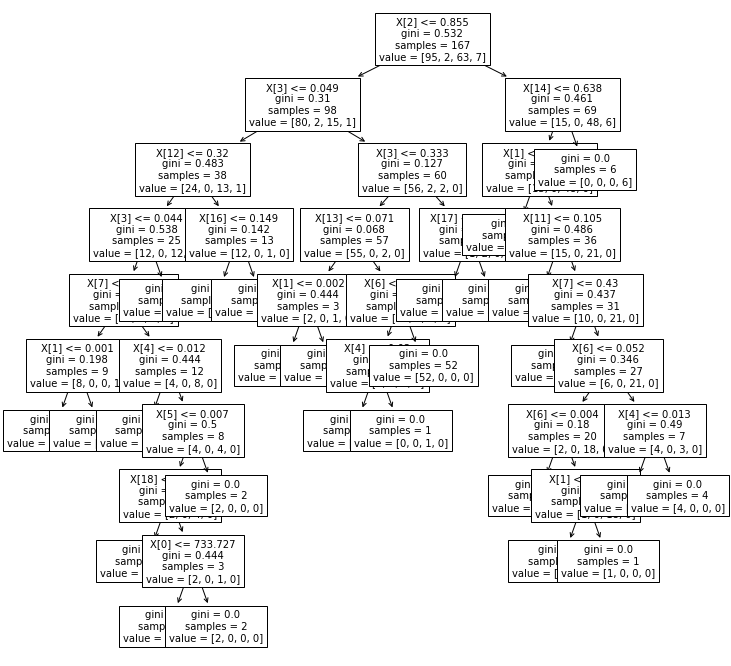

Tree of depth 12
accuracy score: 0.6506024096385542


|--- prop_white <= 0.86
|   |--- prop_Black <= 0.05
|   |   |--- prop_bachelors <= 0.32
|   |   |   |--- prop_white <= 0.83
|   |   |   |   |--- prop_white <= 0.73
|   |   |   |   |   |--- prop_nonfamily <= 0.17
|   |   |   |   |   |   |--- prop_more_than_100k <= 0.70
|   |   |   |   |   |   |   |--- class: Republican,Close
|   |   |   |   |   |   |--- prop_more_than_100k >  0.70
|   |   |   |   |   |   |   |--- total_pop <= 733.73
|   |   |   |   |   |   |   |   |--- class: Republican,Close
|   |   |   |   |   |   |   |--- total_pop >  733.73
|   |   |   |   |   |   |   |   |--- class: Democrat,Close
|   |   |   |   |   |--- prop_nonfamily >  0.17
|   |   |   |   |   |   |--- prop_under_hs <= 0.40
|   |   |   |   |   |   |   |--- class: Democrat,Close
|   |   |   |   |   |   |--- prop_under_hs >  0.40
|   |   |   |   |   |   |   |--- class: Republican,Split
|   |   |   |   |--- prop_white >  0.73
|   |   |   |   |   |--- class: Rep

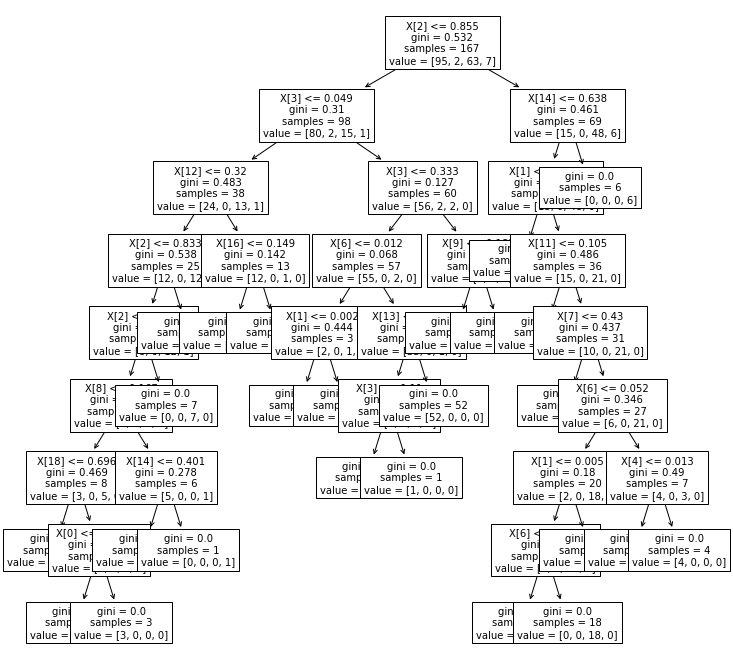

Tree of depth 13
accuracy score: 0.6867469879518072


|--- prop_white <= 0.86
|   |--- prop_Black <= 0.05
|   |   |--- prop_bachelors <= 0.32
|   |   |   |--- prop_white <= 0.83
|   |   |   |   |--- prop_white <= 0.73
|   |   |   |   |   |--- prop_nonfamily <= 0.17
|   |   |   |   |   |   |--- prop_more_than_100k <= 0.70
|   |   |   |   |   |   |   |--- class: Republican,Close
|   |   |   |   |   |   |--- prop_more_than_100k >  0.70
|   |   |   |   |   |   |   |--- total_pop <= 733.73
|   |   |   |   |   |   |   |   |--- class: Republican,Close
|   |   |   |   |   |   |   |--- total_pop >  733.73
|   |   |   |   |   |   |   |   |--- class: Democrat,Close
|   |   |   |   |   |--- prop_nonfamily >  0.17
|   |   |   |   |   |   |--- pop_density <= 0.00
|   |   |   |   |   |   |   |--- class: Republican,Split
|   |   |   |   |   |   |--- pop_density >  0.00
|   |   |   |   |   |   |   |--- class: Democrat,Close
|   |   |   |   |--- prop_white >  0.73
|   |   |   |   |   |--- class: Republi

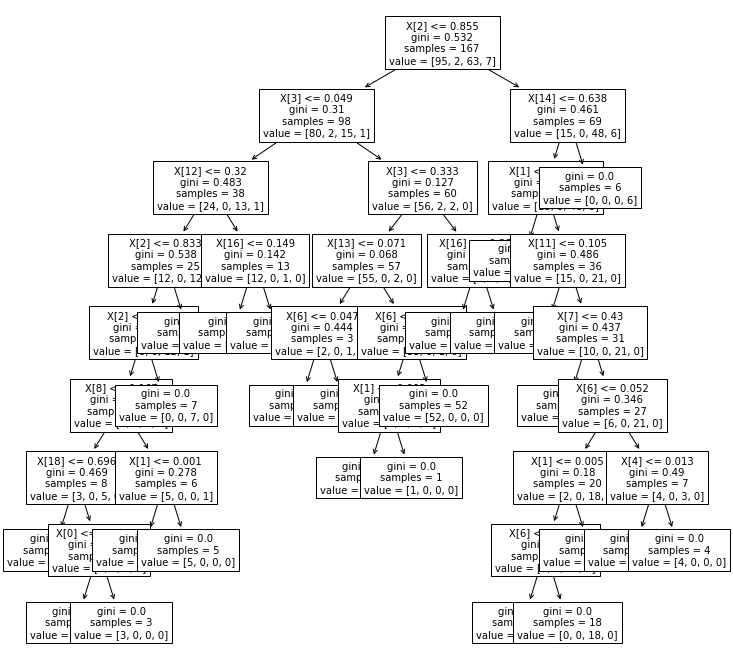

Tree of depth 14
accuracy score: 0.6746987951807228


|--- prop_white <= 0.86
|   |--- prop_Black <= 0.05
|   |   |--- prop_bachelors <= 0.32
|   |   |   |--- pop_density <= 0.00
|   |   |   |   |--- prop_Black <= 0.05
|   |   |   |   |   |--- prop_family_nonmarried <= 0.08
|   |   |   |   |   |   |--- prop_30_to_50k <= 0.06
|   |   |   |   |   |   |   |--- class: Republican,Close
|   |   |   |   |   |   |--- prop_30_to_50k >  0.06
|   |   |   |   |   |   |   |--- prop_family_nonmarried <= 0.08
|   |   |   |   |   |   |   |   |--- class: Democrat,Close
|   |   |   |   |   |   |   |--- prop_family_nonmarried >  0.08
|   |   |   |   |   |   |   |   |--- pop_density <= 0.00
|   |   |   |   |   |   |   |   |   |--- class: Democrat,Close
|   |   |   |   |   |   |   |   |--- pop_density >  0.00
|   |   |   |   |   |   |   |   |   |--- class: Republican,Close
|   |   |   |   |   |--- prop_family_nonmarried >  0.08
|   |   |   |   |   |   |--- prop_Black <= 0.03
|   |   |   |   |   |   |   |--

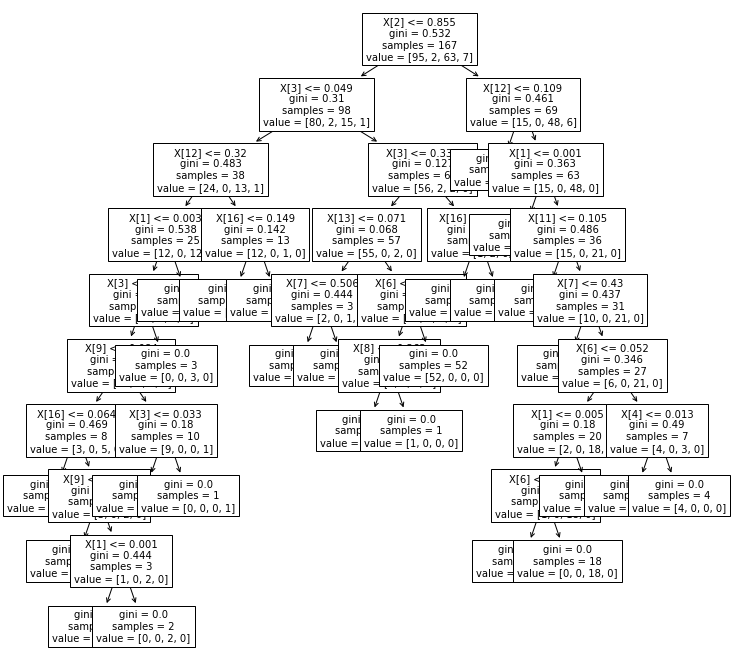

Tree of depth 15
accuracy score: 0.6626506024096386


|--- prop_white <= 0.86
|   |--- prop_Black <= 0.05
|   |   |--- prop_bachelors <= 0.32
|   |   |   |--- prop_Black <= 0.04
|   |   |   |   |--- prop_married <= 0.70
|   |   |   |   |   |--- prop_30_to_50k <= 0.17
|   |   |   |   |   |   |--- class: Democrat,Close
|   |   |   |   |   |--- prop_30_to_50k >  0.17
|   |   |   |   |   |   |--- class: Republican,Split
|   |   |   |   |--- prop_married >  0.70
|   |   |   |   |   |--- prop_Hispanic <= 0.01
|   |   |   |   |   |   |--- class: Republican,Close
|   |   |   |   |   |--- prop_Hispanic >  0.01
|   |   |   |   |   |   |--- prop_Black <= 0.01
|   |   |   |   |   |   |   |--- class: Republican,Close
|   |   |   |   |   |   |--- prop_Black >  0.01
|   |   |   |   |   |   |   |--- prop_30_to_50k <= 0.07
|   |   |   |   |   |   |   |   |--- class: Democrat,Close
|   |   |   |   |   |   |   |--- prop_30_to_50k >  0.07
|   |   |   |   |   |   |   |   |--- pop_density <= 0.00
|   |   | 

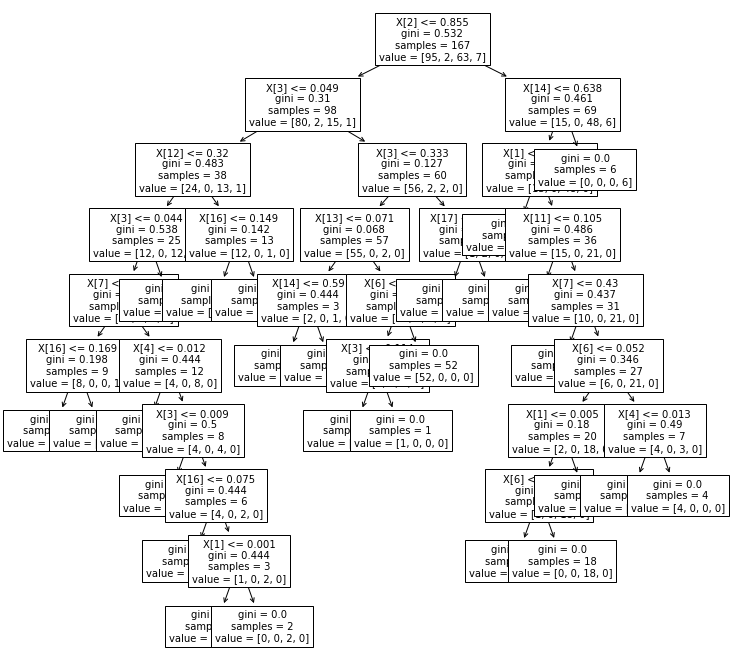

Tree of depth 16
accuracy score: 0.6746987951807228


|--- prop_white <= 0.86
|   |--- prop_Black <= 0.05
|   |   |--- prop_bachelors <= 0.32
|   |   |   |--- prop_white <= 0.83
|   |   |   |   |--- prop_white <= 0.73
|   |   |   |   |   |--- prop_nonfamily <= 0.17
|   |   |   |   |   |   |--- prop_more_than_100k <= 0.70
|   |   |   |   |   |   |   |--- class: Republican,Close
|   |   |   |   |   |   |--- prop_more_than_100k >  0.70
|   |   |   |   |   |   |   |--- total_pop <= 733.73
|   |   |   |   |   |   |   |   |--- class: Republican,Close
|   |   |   |   |   |   |   |--- total_pop >  733.73
|   |   |   |   |   |   |   |   |--- class: Democrat,Close
|   |   |   |   |   |--- prop_nonfamily >  0.17
|   |   |   |   |   |   |--- total_pop <= 1601.64
|   |   |   |   |   |   |   |--- class: Republican,Split
|   |   |   |   |   |   |--- total_pop >  1601.64
|   |   |   |   |   |   |   |--- class: Democrat,Close
|   |   |   |   |--- prop_white >  0.73
|   |   |   |   |   |--- class: Repub

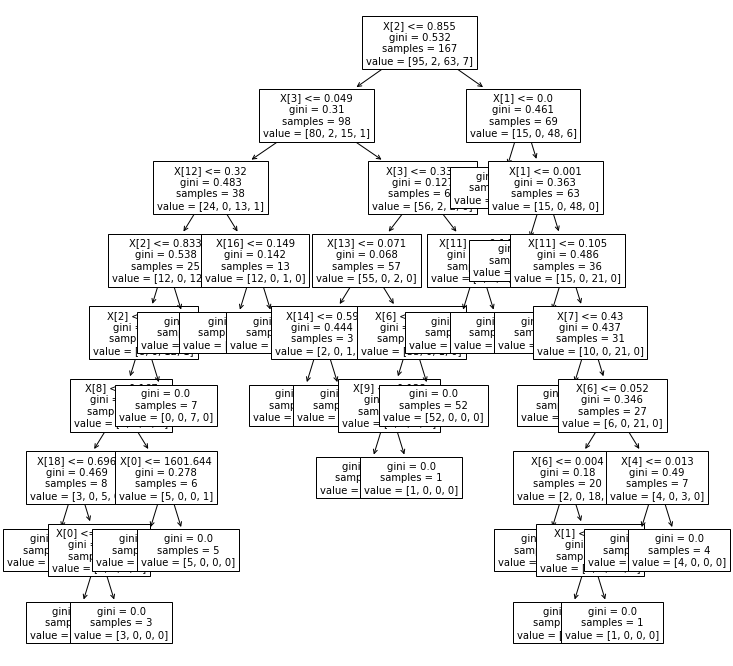

Tree of depth 17
accuracy score: 0.6626506024096386


|--- prop_white <= 0.86
|   |--- prop_Black <= 0.05
|   |   |--- prop_bachelors <= 0.32
|   |   |   |--- prop_white <= 0.83
|   |   |   |   |--- prop_white <= 0.73
|   |   |   |   |   |--- prop_nonfamily <= 0.17
|   |   |   |   |   |   |--- prop_more_than_100k <= 0.70
|   |   |   |   |   |   |   |--- class: Republican,Close
|   |   |   |   |   |   |--- prop_more_than_100k >  0.70
|   |   |   |   |   |   |   |--- total_pop <= 733.73
|   |   |   |   |   |   |   |   |--- class: Republican,Close
|   |   |   |   |   |   |   |--- total_pop >  733.73
|   |   |   |   |   |   |   |   |--- class: Democrat,Close
|   |   |   |   |   |--- prop_nonfamily >  0.17
|   |   |   |   |   |   |--- total_pop <= 1601.64
|   |   |   |   |   |   |   |--- class: Republican,Split
|   |   |   |   |   |   |--- total_pop >  1601.64
|   |   |   |   |   |   |   |--- class: Democrat,Close
|   |   |   |   |--- prop_white >  0.73
|   |   |   |   |   |--- class: Repub

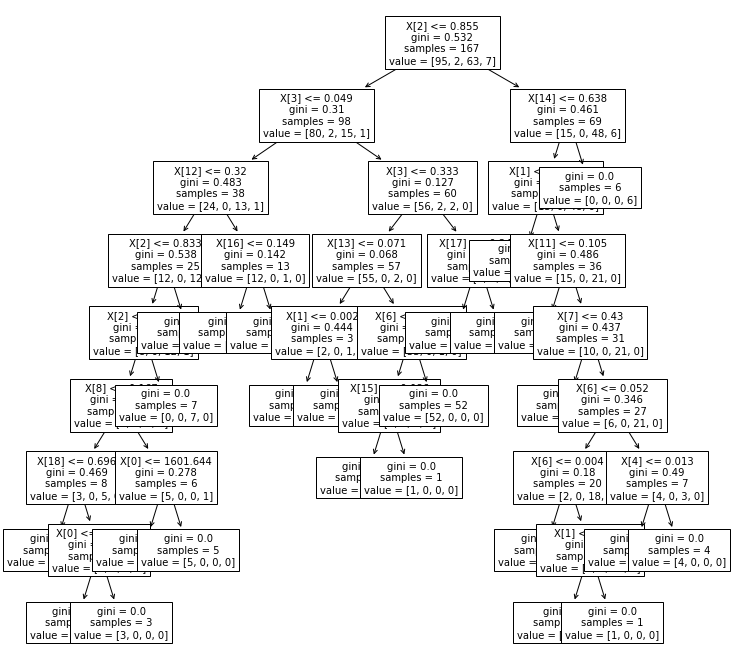

Tree of depth 18
accuracy score: 0.6867469879518072


|--- prop_white <= 0.86
|   |--- prop_Black <= 0.05
|   |   |--- prop_bachelors <= 0.32
|   |   |   |--- prop_white <= 0.83
|   |   |   |   |--- prop_white <= 0.73
|   |   |   |   |   |--- prop_nonfamily <= 0.17
|   |   |   |   |   |   |--- prop_more_than_100k <= 0.70
|   |   |   |   |   |   |   |--- class: Republican,Close
|   |   |   |   |   |   |--- prop_more_than_100k >  0.70
|   |   |   |   |   |   |   |--- total_pop <= 733.73
|   |   |   |   |   |   |   |   |--- class: Republican,Close
|   |   |   |   |   |   |   |--- total_pop >  733.73
|   |   |   |   |   |   |   |   |--- class: Democrat,Close
|   |   |   |   |   |--- prop_nonfamily >  0.17
|   |   |   |   |   |   |--- pop_density <= 0.00
|   |   |   |   |   |   |   |--- class: Republican,Split
|   |   |   |   |   |   |--- pop_density >  0.00
|   |   |   |   |   |   |   |--- class: Democrat,Close
|   |   |   |   |--- prop_white >  0.73
|   |   |   |   |   |--- class: Republi

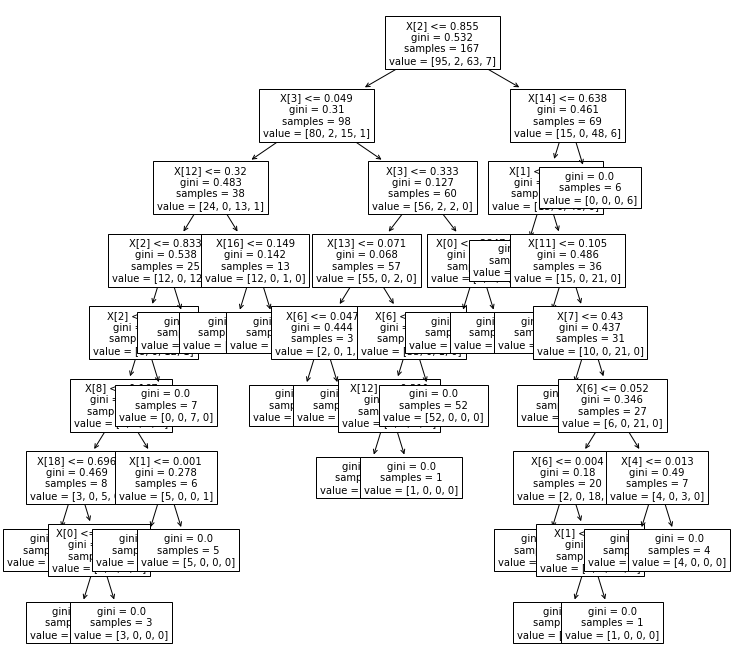

In [22]:
for i in range(1, len(col_names)):
    print(f'Tree of depth {i}')
    
    tree_i = tree.DecisionTreeClassifier(criterion='gini', max_depth=i)
    tree_i.fit(X_train, y_train)
    y_pred = tree_i.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f'accuracy score: {accuracy}')
    print('\n')

    tree_rules = tree.export_text(tree_i, feature_names=col_names)
    print(tree_rules)

    plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
    tree.plot_tree(tree_i, fontsize=10)
    plt.show()

In [ ]:
# decision tree for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
# define dataset
X_train, y_train = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	# print('Feature: %0d, Score: %.5f' % (col_names[i],v))
	print(f"Feature {i}: {col_names[i]}, Score {v}.")
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature 0: total_pop, Score 0.0027282569674370763.
Feature 1: pop_density, Score 0.004369360936903876.
Feature 2: prop_white, Score 0.0028153826191044317.
Feature 3: prop_Black, Score 0.0018993885555710862.
Feature 4: prop_Hispanic, Score 0.5164400951798016.
Feature 5: prop_AIA, Score 0.4374760704535814.
Feature 6: prop_Asian, Score 0.027395441129652642.


IndexError: list index out of range